In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 
from bayes_opt import BayesianOptimization 
import scipy as sp 
import mph 
import pandas as pd
from bayes_opt import UtilityFunction
from stl import mesh
from bayes_opt.event import DEFAULT_EVENTS, Events
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

C:\Users\Harri\AppData\Local\Temp\ipykernel_10036\2220494506.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


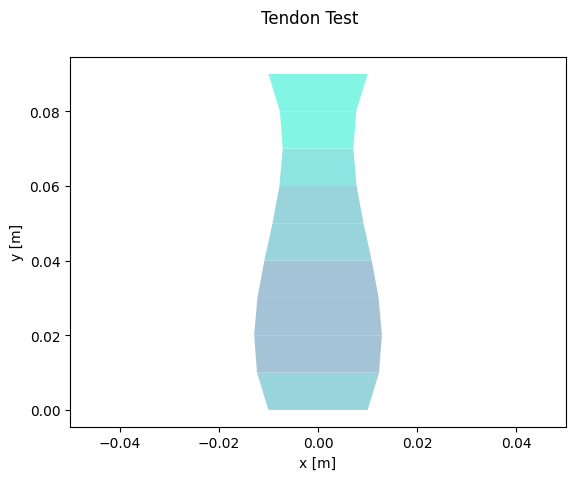

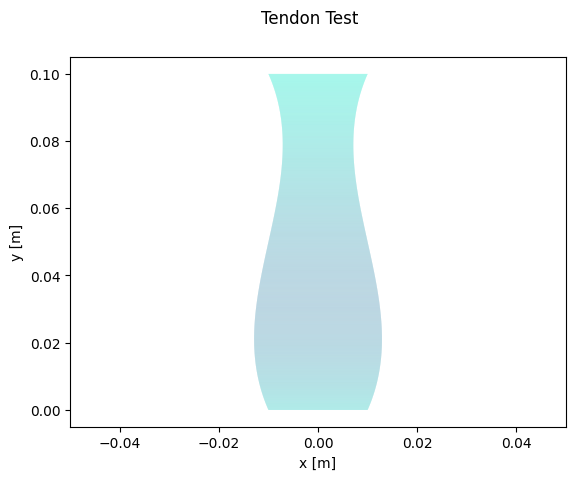

In [21]:
# Draw a Tendon as a spline with a gradient inside 
def hex_to_RGB(hex):
  ''' "#FFFFFF" -> [255,255,255] '''
  # Pass 16 to the integer function for change of base
  return [int(hex[i:i+2], 16) for i in range(1,6,2)]


def RGB_to_hex(RGB):
  ''' [255,255,255] -> "#FFFFFF" '''
  # Components need to be integers for hex to make sense
  RGB = [int(x) for x in RGB]
  return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])
  
def color_dict(gradient):
  ''' Takes in a list of RGB sub-lists and returns dictionary of
    colors in RGB and hex form for use in a graphing function
    defined later on '''
  return {"hex":[RGB_to_hex(RGB) for RGB in gradient],
      "r":[RGB[0] for RGB in gradient],
      "g":[RGB[1] for RGB in gradient],
      "b":[RGB[2] for RGB in gradient]}


def linear_gradient(start_hex, finish_hex="#FFFFFF", n=10):
  ''' returns a gradient list of (n) colors between
    two hex colors. start_hex and finish_hex
    should be the full six-digit color string,
    inlcuding the number sign ("#FFFFFF") '''
  # Starting and ending colors in RGB form
  s = hex_to_RGB(start_hex)
  f = hex_to_RGB(finish_hex)
  # Initilize a list of the output colors with the starting color
  RGB_list = [s]
  # Calcuate a color at each evenly spaced value of t from 1 to n
  for t in range(1, n):
    # Interpolate RGB vector for color at the current value of t
    curr_vector = [
      int(s[j] + (float(t)/(n-1))*(f[j]-s[j]))
      for j in range(3)
    ]
    # Add it to our list of output colors
    RGB_list.append(curr_vector)

  return color_dict(RGB_list)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def graph_tendon(radius,S,L,steps):
  #No. of blocks
  ## Splines
  shores = np.linspace(15,60,steps)
  colour = linear_gradient("#83f5e5", finish_hex="#e761bd", n=steps)
  indexs = np.zeros((1,steps))
  for i in range(1,steps):
    indexs[0,i] = find_nearest(shores, S[i]) # pulls index for colour
  
  fig, ax = plt.subplots()
  coloursrgb = np.zeros((steps,3))
  coloursrgb[:,0] = colour['r'][:]
  coloursrgb[:,1] = colour['g'][:]
  coloursrgb[:,2] = colour['b'][:]
  cmap_name = 'my_list'
  map = LinearSegmentedColormap.from_list(cmap_name, coloursrgb/255, N=steps)
      
  for step in range(1,steps):
      # Draw polygon 
      # Edges of polygon in general are spline points 
      coord = [[(L/steps)*step,radius[step]], [(L/steps)*(step),-radius[step]], [(L/steps)*(step-1),-radius[step-1]], [(L/steps)*(step-1),radius[step-1]]]
      coord.append(coord[0]) #repeat the first point to create a 'closed loop'
      xs, ys = zip(*coord) #create lists of x and y values
      ii = int(indexs[0,step])
      ax.fill(ys,xs,colour['hex'][ii])
      ax.set_xlabel('x [m]')
      ax.set_ylabel('y [m]')
      ax.set_xlim([-0.05, 0.05])    
  fig.suptitle('Tendon Test')
  fig.savefig('test.png')

def compare_coarse(params,steps):
  
  s1 = params[0]
  s2 = params[1]
  s3 = params[2]
  s4 = params[3]
  r1 = params[4]
  r2 = params[5]
  L = params[6]
  
  x = np.linspace(0,1,steps) 
  S = s1*(1-x)**3 + s2*3*x*(1-x)**2 + s3*3*x**2*(1-x) + s4*x**3
  radius = 0.01*(1-x)**3 + r1*3*x*(1-x)**2 + r2*3*x**2*(1-x) + 0.01*x**3
  graph_tendon(radius,S,L,steps)
  
  x = np.linspace(0,1,1000) 
  S = s1*(1-x)**3 + s2*3*x*(1-x)**2 + s3*3*x**2*(1-x) + s4*x**3
  radius = 0.01*(1-x)**3 + r1*3*x*(1-x)**2 + r2*3*x**2*(1-x) + 0.01*x**3
  graph_tendon(radius,S,L,1000)

steps = 10
x = np.linspace(0,1,steps) 
 
s1 = 20
s2 = 40
s3 =20
s4 = 15
r1 = 0.02
r2 = 0
L = 0.1
params = [s1, s2 , s3, s4 ,r1,r2,L]
compare_coarse(params,steps)

# Plot splines with gradients if possible
# Plot polygons as chunks 

{'hex': ['#83f5e5', '#8ee4e0', '#99d4dc', '#a4c3d7', '#afb3d3', '#baa2ce', '#c592ca', '#d081c5', '#db71c1', '#e761bd'], 'r': [131, 142, 153, 164, 175, 186, 197, 208, 219, 231], 'g': [245, 228, 212, 195, 179, 162, 146, 129, 113, 97], 'b': [229, 224, 220, 215, 211, 206, 202, 197, 193, 189]}
#83f5e5
{'red': (), 'green': (), 'blue': ()}
[131, 142, 153, 164, 175, 186, 197, 208, 219, 231]
[[0.51372549 0.96078431 0.89803922]
 [0.55686275 0.89411765 0.87843137]
 [0.6        0.83137255 0.8627451 ]
 [0.64313725 0.76470588 0.84313725]
 [0.68627451 0.70196078 0.82745098]
 [0.72941176 0.63529412 0.80784314]
 [0.77254902 0.57254902 0.79215686]
 [0.81568627 0.50588235 0.77254902]
 [0.85882353 0.44313725 0.75686275]
 [0.90588235 0.38039216 0.74117647]]


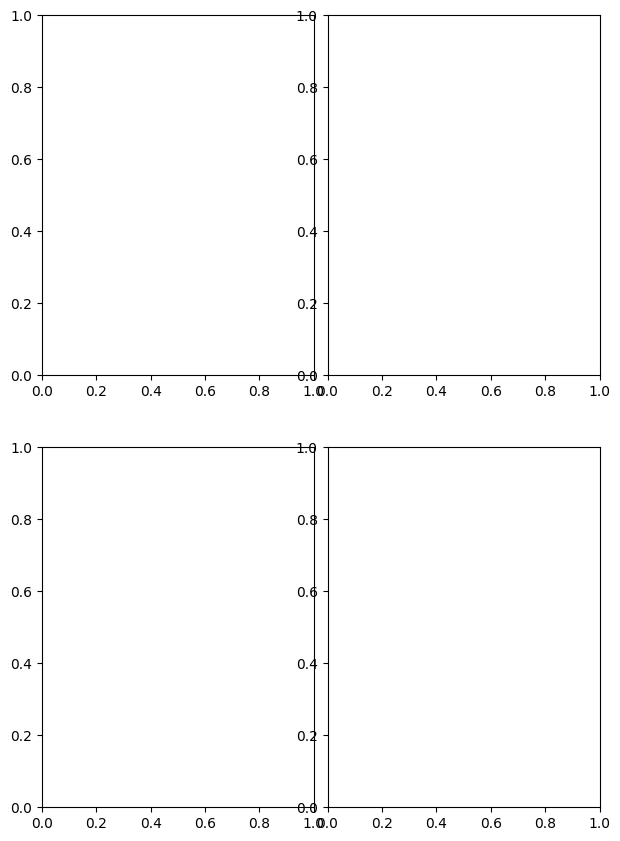

In [21]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
print(colour)
print(colour['hex'][0])
cdict =  {
    'red': (),
    'green': (),
    'blue': ()
}
print(cdict)
print(colour['r'][:])
coloursrgb = np.zeros((10,3))
coloursrgb[:,0] = colour['r'][:]
coloursrgb[:,1] = colour['g'][:]
coloursrgb[:,2] = colour['b'][:]
cmap_name = 'my_list'
map = LinearSegmentedColormap.from_list(cmap_name, coloursrgb/255, N=10)


# for n_bin, ax in zip(n_bins, axs.flat):
#     # Create the colormap
#     cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
#     # Fewer bins will result in "coarser" colomap interpolation
#     im = ax.imshow(Z, origin='lower', cmap=cmap)
#     ax.set_title("N bins: %s" % n_bin)
#     fig.colorbar(im, ax=ax)

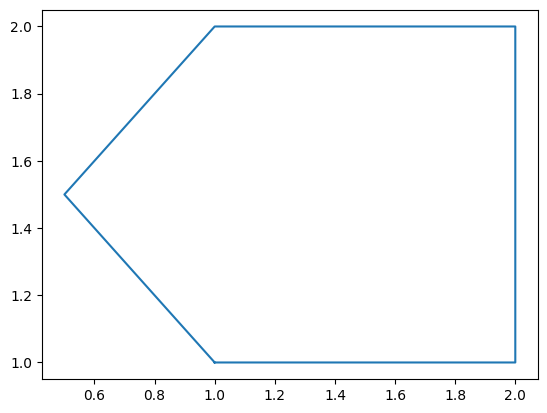

In [5]:
import matplotlib.pyplot as plt

coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

plt.figure()
plt.plot(xs,ys, ) 
plt.show() # if you need..